<a href="https://colab.research.google.com/github/Muskaan-Aggarwal/-AI-Powered-Agri-Waste-Composting-Optimization-project/blob/main/AI_Powered_Agri_Waste_Composting_Optimization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data saved successfully at: /content/drive/MyDrive/agri waste/compost.csv


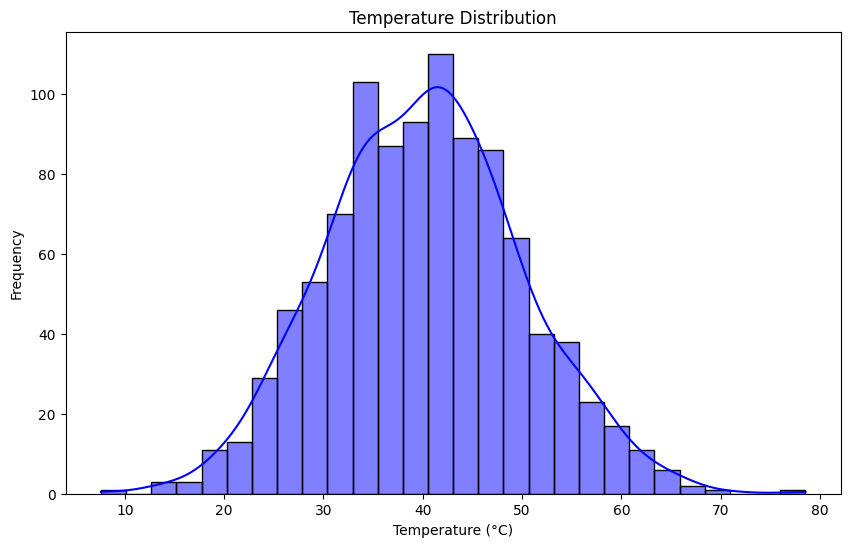

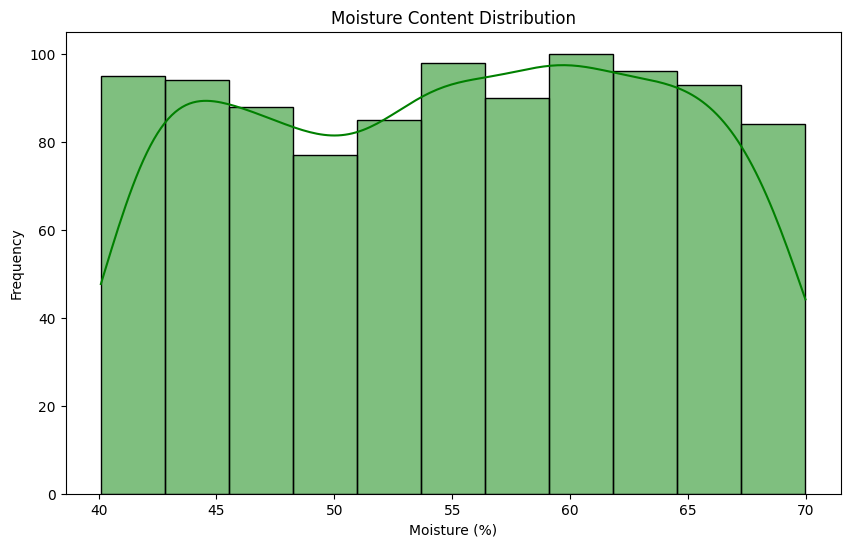

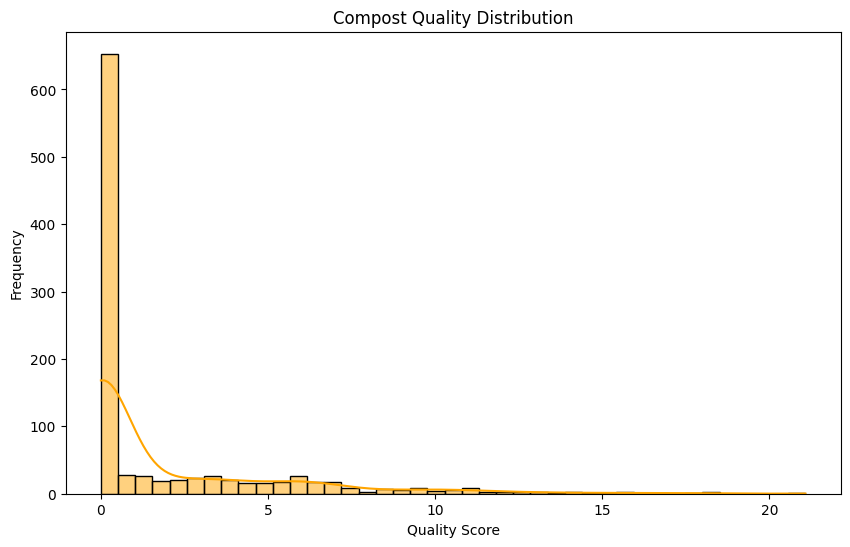

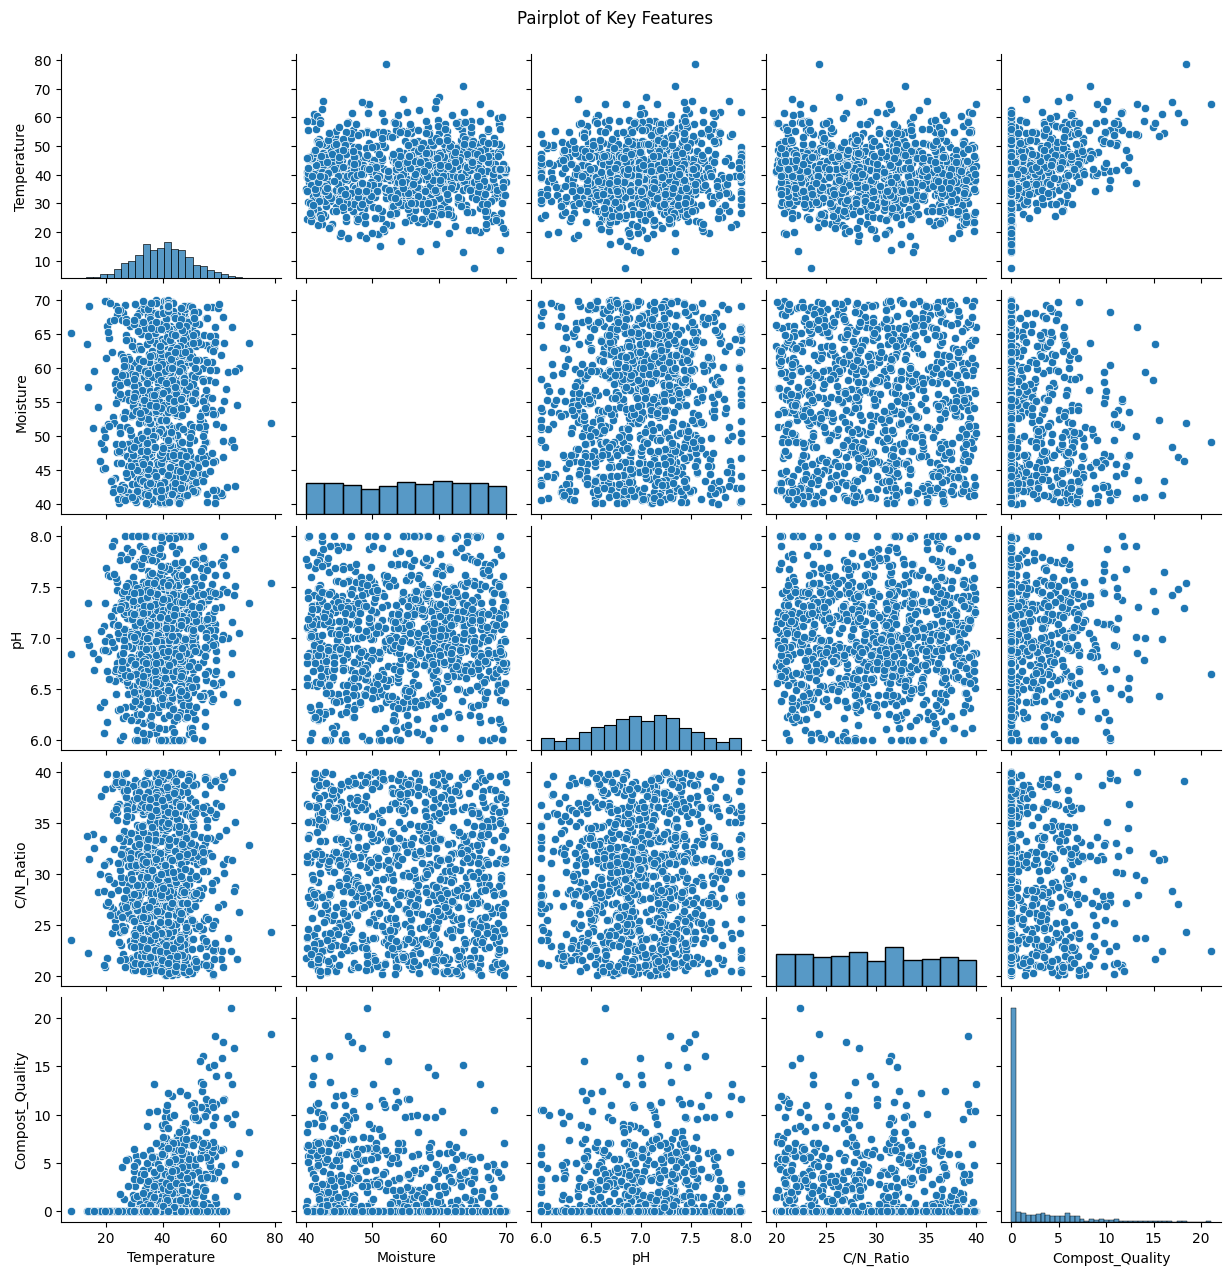

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Generate synthetic data based on realistic ranges and distributions

# Temperature (°C): Normal distribution around 40°C with some variability
temperature = np.random.normal(loc=40, scale=10, size=num_samples)  # Mean: 40, Std: 10

# Moisture Content (%): Uniform distribution between 40% and 70%
moisture = np.random.uniform(40, 70, num_samples)

# pH Levels: Normally distributed around 7 with a small deviation
pH = np.clip(np.random.normal(loc=7, scale=0.5, size=num_samples), 6, 8)  # Clipped to realistic range 6-8

# Carbon-to-Nitrogen Ratio (C/N Ratio): Uniformly distributed between 20 and 40
C_N_ratio = np.random.uniform(20, 40, num_samples)

# Aeration Rate: Normally distributed with a mean of 1 (unitless), representing airflow rate
aeration_rate = np.random.normal(loc=1, scale=0.3, size=num_samples)  # Mean: 1, Std: 0.3

# Composting Duration (Days): Integer values between 30 and 120 days
compost_duration = np.random.randint(30, 120, num_samples)

# Initial Composition of Waste: Randomly chosen categories representing different agri-wastes
initial_composition = np.random.choice(['Crop Residue', 'Manure', 'Food Waste'], num_samples)

# Additives Used: Random selection of additives commonly used in composting
additive_used = np.random.choice(['None', 'Lime', 'Biochar', 'Microbial Inoculant'], num_samples)

# Turning Frequency (times per week): Random integer values between 1 and 5
turning_frequency = np.random.randint(1, 5, num_samples)

# Interaction term example: Temperature x Moisture to capture non-linear effects
temp_moisture_interaction = temperature * (moisture / 100)

# Generate a synthetic target variable (Compost Quality)
# Using a simplified model with noise to simulate real-world variability
compost_quality = (
    0.4 * temperature
    - 0.3 * moisture
    + 0.5 * pH
    - 0.2 * C_N_ratio
    + 0.1 * aeration_rate
    + 0.2 * turning_frequency
    + np.random.normal(0, 5, num_samples)  # Adding noise to simulate variability
)

# Clip compost_quality to a reasonable range (e.g., 0-100 for quality score)
compost_quality = np.clip(compost_quality, 0, 100)

# Create a DataFrame to organize the generated synthetic data
synthetic_data = pd.DataFrame({
    'Temperature': temperature,
    'Moisture': moisture,
    'pH': pH,
    'C/N_Ratio': C_N_ratio,
    'Aeration_Rate': aeration_rate,
    'Compost_Duration': compost_duration,
    'Initial_Composition': initial_composition,
    'Additive_Used': additive_used,
    'Turning_Frequency': turning_frequency,
    'Temp_Moisture_Interaction': temp_moisture_interaction,
    'Compost_Quality': compost_quality
})

# Define the path where you want to save the synthetic data
# Example: Saving to a folder named 'data' on the Desktop
save_path = os.path.expanduser("/content/drive/MyDrive/agri waste/compost.csv")

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the synthetic dataset to the specified path
synthetic_data.to_csv(save_path, index=False)

print(f"Data saved successfully at: {save_path}")

# Visualize the data distributions to validate the generated synthetic data
# Plot temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(synthetic_data['Temperature'], kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Plot moisture distribution
plt.figure(figsize=(10, 6))
sns.histplot(synthetic_data['Moisture'], kde=True, color='green')
plt.title('Moisture Content Distribution')
plt.xlabel('Moisture (%)')
plt.ylabel('Frequency')
plt.show()

# Plot compost quality distribution
plt.figure(figsize=(10, 6))
sns.histplot(synthetic_data['Compost_Quality'], kde=True, color='orange')
plt.title('Compost Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

# Plot a pairplot to check relationships between key variables
sns.pairplot(synthetic_data[['Temperature', 'Moisture', 'pH', 'C/N_Ratio', 'Compost_Quality']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
# Replace 'compost_data.csv' with the actual path to your dataset
data = pd.read_csv('/content/drive/MyDrive/agri waste/compost.csv')

# Display the first few rows
print(data.head())

# Preprocess data: Handle missing values, if any
data = data.dropna()

# Define features (X) and target (y)
# Use actual feature column names from the DataFrame
X = data[['Temperature', 'Moisture', 'pH', 'C/N_Ratio']]  # Use correct column names
y = data['Compost_Quality']  # Use correct column name

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   Temperature   Moisture        pH  C/N_Ratio  Aeration_Rate  \
0    44.967142  45.024477  6.845395  25.129261       1.576110   
1    38.617357  43.137035  6.623922  27.106395       0.633131   
2    46.476885  59.092907  7.159587  33.479884       1.021376   
3    55.230299  61.194272  7.670225  21.251297       0.611948   
4    37.658466  40.947584  6.062414  24.210139       0.791292   

   Compost_Duration Initial_Composition        Additive_Used  \
0                31        Crop Residue  Microbial Inoculant   
1               111          Food Waste                 Lime   
2               106              Manure              Biochar   
3                98        Crop Residue  Microbial Inoculant   
4                87              Manure                 Lime   

   Turning_Frequency  Temp_Moisture_Interaction  Compost_Quality  
0                  3                  20.246221         4.668827  
1                  3                  16.658383         2.308133  
2                  1   

In [10]:

X_train = pd.DataFrame(X_train, columns=['temperature', 'moisture', 'pH', 'C/N_ratio', 'temp_moisture_interaction']) # Added 'temp_moisture_interaction' to columns
X_test = pd.DataFrame(X_test, columns=['temperature', 'moisture', 'pH', 'C/N_ratio', 'temp_moisture_interaction']) # Added 'temp_moisture_interaction' to columns

# Add feature: Temperature-Moisture Interaction
X_train['temp_moisture_interaction'] = X_train['temperature'] * X_train['moisture']
X_test['temp_moisture_interaction'] = X_test['temperature'] * X_test['moisture']

# Print the first few rows of the transformed X_train to verify
print(X_train.head())

# Convert back to arrays for model training
X_train = X_train.values
X_test = X_test.values

   temperature  moisture        pH  C/N_ratio  temp_moisture_interaction
0    -0.017364  1.021314  0.645201  -1.124532                  -0.017734
1     1.118297  0.164950 -0.021900  -0.384239                   0.184463
2     1.140070 -1.213385 -0.281064   1.616784                  -1.383344
3    -0.051029 -0.067466  0.191058  -0.817286                   0.003443
4     0.468906  1.252957  2.176429   0.692051                   0.587519


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Mean Squared Error (MSE): 7.79
R-squared Score (R²): 0.41


In [12]:
# Sample input for prediction
sample_input = np.array([[30, 55, 7.5, 20, 1650]])  # Example values: temperature, moisture, pH, C/N_ratio, interaction

# Make a prediction
sample_pred = model.predict(sample_input)
print(f'Predicted Compost Quality: {sample_pred[0]:.2f}')


Predicted Compost Quality: 5.99
